## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from funcoes.funcoes import *

import warnings
warnings.filterwarnings("ignore")

## Importando dados

In [2]:
dados_WoE_VI = pd.read_csv('dados/dados_WoE_VI.csv')

In [3]:
# variáveis, nulos e tipos de dados

dados_WoE_VI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877648 entries, 0 to 877647
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_amnt          877648 non-null  float64
 1   term                 877648 non-null  int64  
 2   int_rate             877648 non-null  float64
 3   home_ownership       877648 non-null  object 
 4   annual_inc           877648 non-null  float64
 5   verification_status  877648 non-null  object 
 6   purpose              877648 non-null  object 
 7   dti                  877648 non-null  float64
 8   inq_last_6mths       877648 non-null  float64
 9   revol_util           877648 non-null  float64
 10  initial_list_status  877648 non-null  object 
 11  tot_cur_bal          877648 non-null  float64
 12  mths_since_rcnt_il   877648 non-null  float64
 13  total_bal_il         877648 non-null  float64
 14  max_bal_bc           877648 non-null  float64
 15  total_rev_hi_lim 

## Variáveis selecionadas

- **funded_amnt:** O valor total comprometido com esse empréstimo naquele momento;
- **term:** O número de pagamentos do empréstimo. Os valores estão em meses e podem ser 36 ou 60;
- **int_rate:** Taxa de juros do empréstimo;
- **home_ownership:** O status de propriedade da casa fornecido pelo mutuário durante o registro ou obtido no relatório de crédito. Nossos valores são: ALUGUEL, PRÓPRIO, HIPOTECA, OUTROS;
- **annual_inc:** A renda anual declarada pelo mutuário do empréstimo durante o registro;
- **verification_status:** Indica se a renda foi verificada por LC, não verificada, ou se a fonte de renda foi verificada;
- **purpose:** Uma categoria fornecida pelo mutuário para a solicitação de empréstimo;
- **dti:** Um índice calculado usando o total de pagamentos mensais da dívida do mutuário sobre o total das obrigações da dívida, excluindo hipoteca e o empréstimo LC solicitado, dividido pela renda mensal informada do mutuário;
- **inq_last_6mths:** O número de consultas nos últimos 6 meses (excluindo consultas de automóveis e hipotecas);
- **revol_util:** Taxa de utilização da linha rotativa, ou a quantidade de crédito que o mutuário está usando em relação a todo o crédito rotativo disponível;
- **initial_list_status:** O status de listagem inicial do empréstimo. Os valores possíveis são – W, F;
- **tot_cur_bal:** Saldo atual total de todas as contas;
- **mths_since_rcnt_il:** Meses desde que as contas de parcelamento mais recentes foram abertas;
- **max_bal_bc:** Saldo atual máximo devido em todas as contas rotativas;
- **grade:** LC grau de empréstimo atribuído;
- **total_bal_il:** Saldo atual total de todas as contas parceladas;
- **total_rev_hi_lim:** Total rotativo alto crédito/limite de crédito.               

### Variáveis dummie

In [4]:
# criando dummies para variáveis categóricas

var_dummies = [pd.get_dummies(dados_WoE_VI['purpose'], prefix = 'purpose', prefix_sep = ':'),
               pd.get_dummies(dados_WoE_VI['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
               pd.get_dummies(dados_WoE_VI['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
               pd.get_dummies(dados_WoE_VI['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':'),
               pd.get_dummies(dados_WoE_VI['grade'], prefix = 'grade', prefix_sep = ':')]

var_dummies  = pd.concat(var_dummies, axis = 1)
dados_WoE_VI = pd.concat([dados_WoE_VI, var_dummies], axis = 1)

In [5]:
dados_WoE_VI

,funded_amnt,term,int_rate,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,revol_util,...,verification_status:Verified,initial_list_status:f,initial_list_status:w,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,9000.0,36,5.32,OWN,58000.0,Source Verified,home_improvement,10.39,0.0,4.2,...,0,0,1,1,0,0,0,0,0,0
1,8300.0,36,9.44,RENT,54000.0,Source Verified,debt_consolidation,16.91,0.0,30.7,...,0,0,1,0,1,0,0,0,0,0
2,4225.0,36,17.57,RENT,35000.0,Not Verified,debt_consolidation,29.25,2.0,82.0,...,0,1,0,0,0,0,1,0,0,0
3,28000.0,36,7.49,MORTGAGE,425000.0,Source Verified,debt_consolidation,8.97,0.0,28.0,...,0,1,0,1,0,0,0,0,0,0
4,3000.0,36,5.31,MORTGAGE,72000.0,Not Verified,debt_consolidation,14.60,0.0,3.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877643,29000.0,36,5.32,MORTGAGE,108000.0,Source Verified,credit_card,13.32,0.0,48.8,...,0,1,0,1,0,0,0,0,0,0
877644,13000.0,36,5.32,MORTGAGE,46900.0,Not Verified,car,18.81,0.0,74.1,...,0,0,1,1,0,0,0,0,0,0
877645,12000.0,36,11.47,RENT,70000.0,Source Verified,debt_consolidation,22.36,1.0,69.3,...,0,0,1,0,1,0,0,0,0,0
877646,10000.0,36,12.69,MORTGAGE,35000.0,Verified,debt_consolidation,27.81,1.0,32.3,...,1,0,1,0,0,1,0,0,0,0


### Coarse Classing

Sendo assim, foi-se realizada a *coarse classing*, etapa em que algumas categorias das variáveis foram condensadas, baseando-se no peso de evidência, para que seja possível reduzir o número de variáveis e melhorar o desempenho do modelo.

In [6]:
# separando dados

df_inputs  = dados_WoE_VI.drop(columns = ['target'], axis = 1)
df_targets = dados_WoE_VI['target']

#### Variáveis categóricas

Como existem muitas categorias na variável `home_ownership` com poucas observações (other, none e any) e rent é a mais próxima, optou-se por juntar os dados em apenas uma variável.

In [7]:
df_temp = woe_categorica(df_inputs, 'home_ownership', df_targets)
df_temp

,home_ownership,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,OTHER,68,0.838235,0.000077,57.0,11.0,0.000075,0.000096,-0.255573,NaN,NaN,0.024007
1,RENT,346354,0.849509,0.394639,294231.0,52123.0,0.385356,0.456751,-0.169971,0.011274,0.085603,0.024007
2,OWN,99326,0.867970,0.113173,86212.0,13114.0,0.112912,0.114917,-0.017600,0.018461,0.152370,0.024007
3,NONE,16,0.875000,0.000018,14.0,2.0,0.000018,0.000018,0.045181,0.007030,0.062781,0.024007
4,MORTGAGE,430783,0.886753,0.490838,381998.0,48785.0,0.500305,0.427500,0.157263,0.011753,0.112082,0.024007
5,ANY,1101,0.925522,0.001254,1019.0,82.0,0.001335,0.000719,0.619128,0.038770,0.461865,0.024007


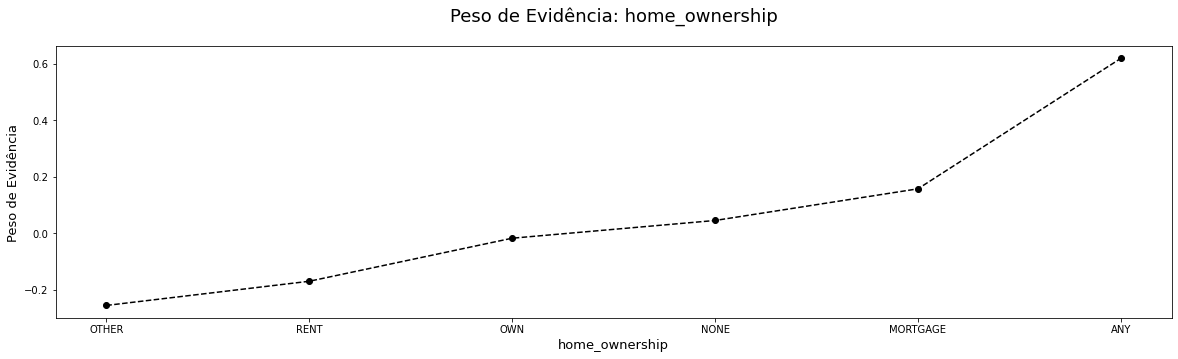

In [8]:
plot_woe(df_temp)

In [9]:
# criação da nova variável

df_inputs['home_ownership:RENT_OTHER_NONE_ANY'] = \
sum([df_inputs['home_ownership:RENT'], 
     df_inputs['home_ownership:OTHER'],
     df_inputs['home_ownership:NONE'],
     df_inputs['home_ownership:ANY']])

`verification_status`

É possível perceber que empréstimo com fonte de renda verificada pela LC têm menos default.

In [10]:
df_temp = woe_categorica(df_inputs, 'verification_status', df_targets)
df_temp

,verification_status,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,Verified,215351,0.818167,0.245373,176193.0,39158.0,0.230761,0.343139,-0.396754,NaN,NaN,0.098472
1,Source Verified,341893,0.865145,0.389556,295787.0,46106.0,0.387394,0.404024,-0.042033,0.046978,0.354721,0.098472
2,Not Verified,320404,0.909948,0.365071,291551.0,28853.0,0.381846,0.252837,0.412271,0.044803,0.454304,0.098472


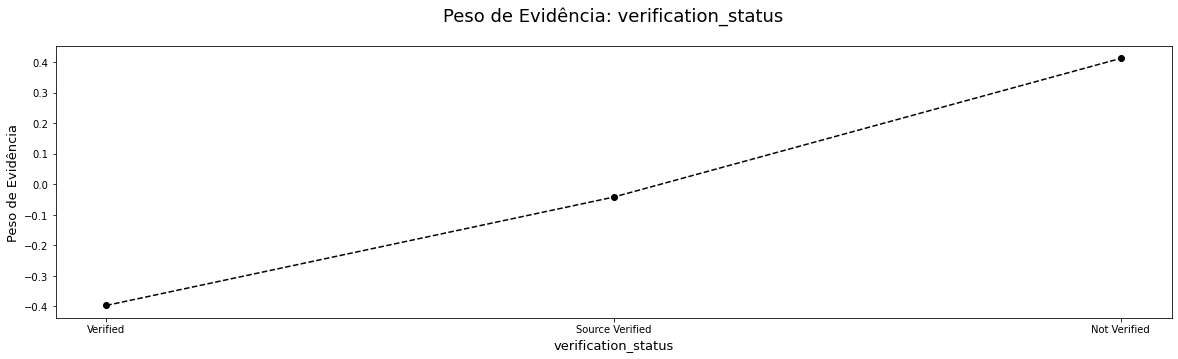

In [11]:
plot_woe(df_temp)

`purpose` 

As seguintes categorias foram agrupadas:

- small_business, educational, moving, renewable_energy
- debt_consolidation
- other, medical
- major purchase, vacation, house, wedding, car
- home_improvement
- credit_card

In [12]:
df_temp = woe_categorica(df_inputs, 'purpose', df_targets)
df_temp

,purpose,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,small_business,8942,0.795124,0.010189,7110.0,1832.0,0.009312,0.016054,-0.544636,NaN,NaN,0.022435
1,educational,120,0.808333,0.000137,97.0,23.0,0.000127,0.000202,-0.461513,0.013209,0.083123,0.022435
2,moving,5674,0.840501,0.006465,4769.0,905.0,0.006246,0.007930,-0.238773,0.032167,0.222740,0.022435
3,renewable_energy,494,0.848178,0.000563,419.0,75.0,0.000549,0.000657,-0.180347,0.007678,0.058426,0.022435
4,debt_consolidation,491672,0.859964,0.560215,422820.0,68852.0,0.553769,0.603346,-0.085742,0.011785,0.094604,0.022435
5,other,53542,0.864275,0.061006,46275.0,7267.0,0.060607,0.063680,-0.049471,0.004311,0.036271,0.022435
6,medical,10529,0.864565,0.011997,9103.0,1426.0,0.011922,0.012496,-0.046999,0.000290,0.002472,0.022435
7,major_purchase,18834,0.869863,0.021460,16383.0,2451.0,0.021457,0.021478,-0.000981,0.005298,0.046017,0.022435
8,vacation,6085,0.870337,0.006933,5296.0,789.0,0.006936,0.006914,0.003211,0.000474,0.004193,0.022435
9,house,6000,0.870667,0.006836,5224.0,776.0,0.006842,0.006800,0.006137,0.000330,0.002925,0.022435


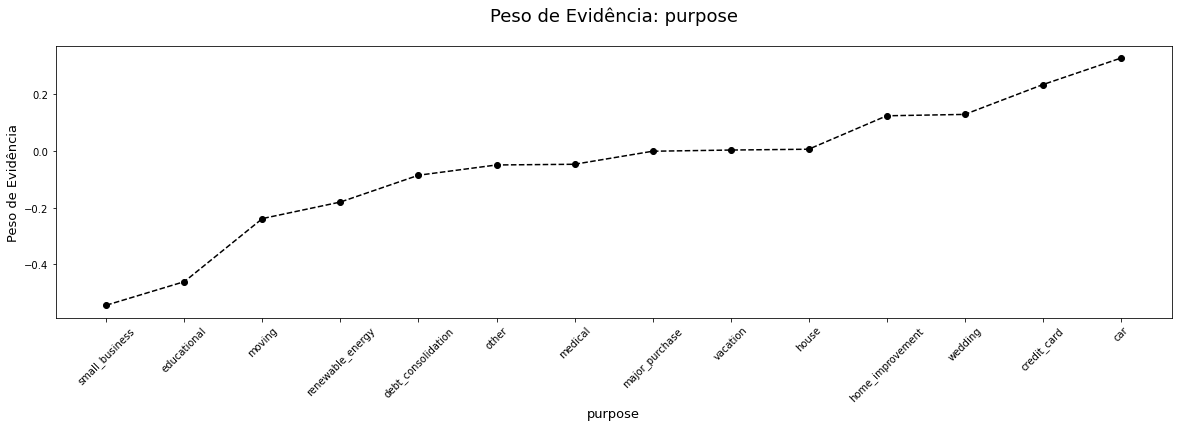

In [13]:
plot_woe(df_temp, 45)

In [14]:
df_inputs['purpose:small_business__educational__moving__renewable_energy'] = \
sum([df_inputs['purpose:small_business'],  
     df_inputs['purpose:educational'], 
     df_inputs['purpose:moving'],
     df_inputs['purpose:renewable_energy']])

df_inputs['purpose:other__medical'] = \
sum([df_inputs['purpose:other'],  
     df_inputs['purpose:medical']])

df_inputs['purpose:major_purchase__vacation__house__wedding__car'] = \
sum([df_inputs['purpose:major_purchase'], 
     df_inputs['purpose:vacation'],
     df_inputs['purpose:house'],
     df_inputs['purpose:wedding'],
     df_inputs['purpose:car']])

`initial_list_status`

In [15]:
df_temp = woe_categorica(df_inputs, 'initial_list_status', df_targets)
df_temp

,initial_list_status,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,f,235609,0.834365,0.268455,196584.0,39025.0,0.257467,0.341974,-0.283842,NaN,NaN,0.034197
1,w,642039,0.883041,0.731545,566947.0,75092.0,0.742533,0.658026,0.120822,0.048676,0.404664,0.034197


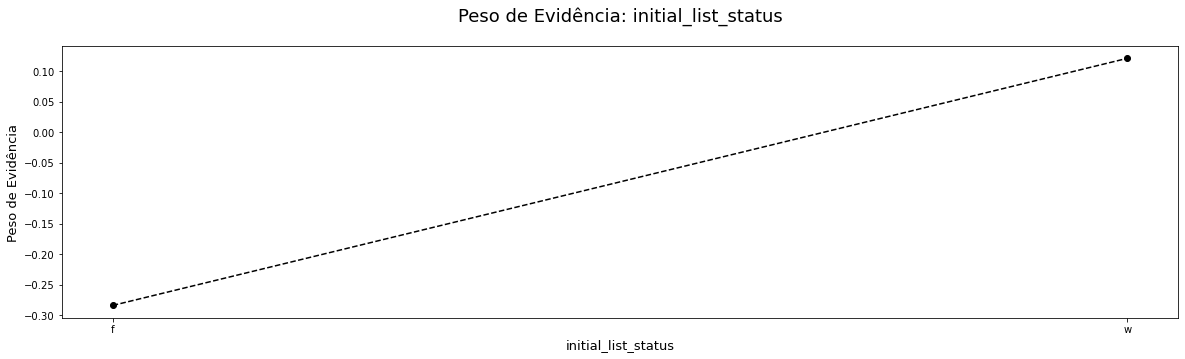

In [16]:
plot_woe(df_temp)

`grade`

In [17]:
df_temp = woe_categorica(df_inputs, 'grade', df_targets)
df_temp

,grade,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,G,3690,0.556369,0.004204,2053.0,1637.0,0.002689,0.014345,-1.674293,NaN,NaN,0.521061
1,F,12714,0.599103,0.014486,7617.0,5097.0,0.009976,0.044665,-1.498999,0.042735,0.175294,0.521061
2,E,41546,0.675300,0.047338,28056.0,13490.0,0.036745,0.118212,-1.168476,0.076196,0.330523,0.521061
3,D,124531,0.790855,0.141892,98486.0,26045.0,0.128988,0.228231,-0.570641,0.115556,0.597835,0.521061
4,C,241174,0.846990,0.274796,204272.0,36902.0,0.267536,0.323370,-0.189543,0.056135,0.381098,0.521061
5,B,257221,0.908196,0.293080,233607.0,23614.0,0.305956,0.206928,0.391071,0.061206,0.580614,0.521061
6,A,196772,0.962739,0.224204,189440.0,7332.0,0.248110,0.064250,1.351095,0.054543,0.960024,0.521061


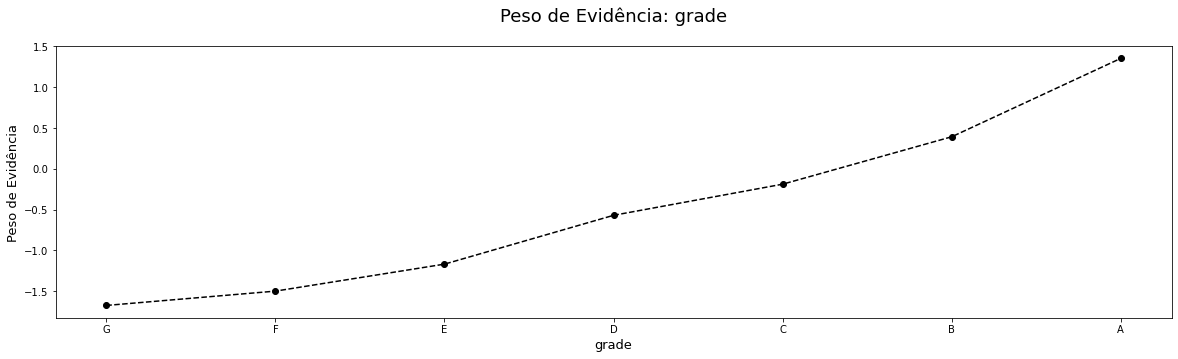

In [18]:
plot_woe(df_temp)

### Fine Classing

Quando temos valores que variam de 0 a 100 e fazemos classes equidistantes e transformamos os dados contínuos/discretos em categorias, chamamos isso de *fine classing*.


#### Variáveis numéricas

`term`

De acordo com a variável `term` empréstimos de 36 meses se mostram menos arriscados do que os de 60 meses.

Número de valores únicos: 2
Distribuição:
count    877648.000000
mean         43.094872
std          10.951706
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term, dtype: float64


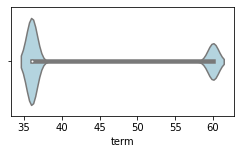

In [19]:
dist(dados_WoE_VI, 'term')

In [20]:
df_temp = woe_continua(df_inputs, 'term', df_targets)
df_temp

,term,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,36,618198,0.889369,0.70438,549806.0,68392.0,0.720083,0.599315,0.183580,NaN,NaN,0.065489
1,60,259450,0.823762,0.29562,213725.0,45725.0,0.279917,0.400685,-0.358685,0.065607,0.542265,0.065489


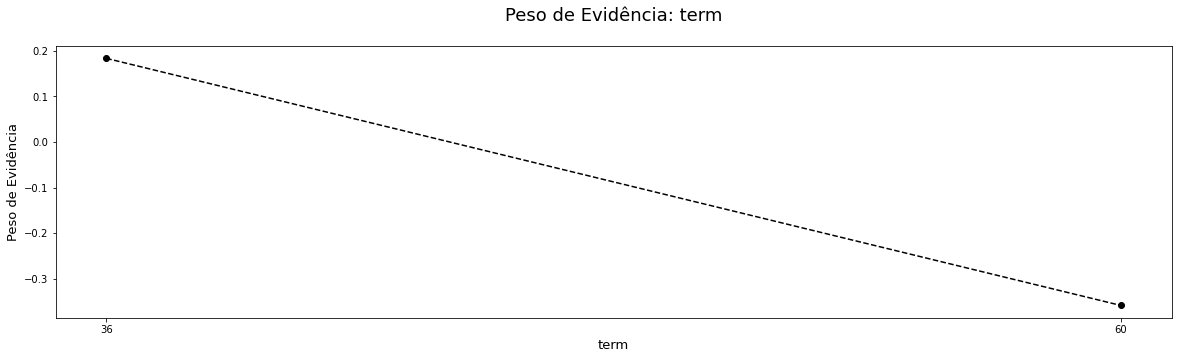

In [21]:
plot_woe(df_temp)

In [22]:
# criando dummies da variável term

df_inputs['term:36'] = np.where((df_inputs['term'] == 36), 1, 0)
df_inputs['term:60'] = np.where((df_inputs['term'] == 60), 1, 0)

`int_rate` 

Apenas as duas últimas classes serão agrupadas.

Número de valores únicos: 678
Distribuição:
count    877648.000000
mean         13.043788
std           4.859772
min           5.310000
25%           9.170000
50%          12.490000
75%          15.990000
max          30.990000
Name: int_rate, dtype: float64


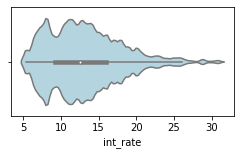

In [23]:
dist(dados_WoE_VI, 'int_rate')

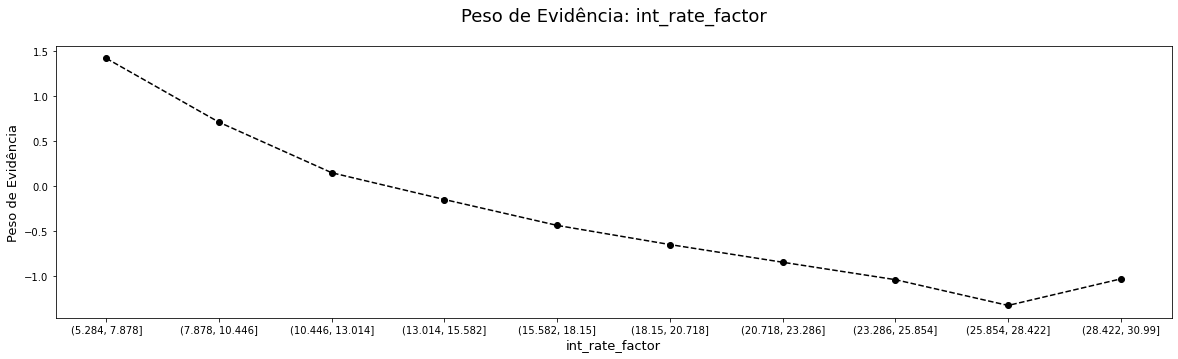

In [24]:
prepr_temp = df_inputs.copy()

prepr_temp['int_rate_factor'] = pd.cut(df_inputs['int_rate'], 10)
plot_woe(woe_continua(prepr_temp,'int_rate_factor', df_targets[prepr_temp.index]))

In [25]:
df_inputs['int_rate:<7.484']        = np.where((df_inputs['int_rate'] <= 7.484), 1, 0)
df_inputs['int_rate:7.484-10.466']  = np.where((df_inputs['int_rate'] > 7.484)  & (df_inputs['int_rate'] <= 10.466), 1, 0)
df_inputs['int_rate:10.466-13.014'] = np.where((df_inputs['int_rate'] > 10.466) & (df_inputs['int_rate'] <= 13.014), 1, 0)
df_inputs['int_rate:13.014-15.582'] = np.where((df_inputs['int_rate'] > 13.014) & (df_inputs['int_rate'] <= 15.582), 1, 0)
df_inputs['int_rate:15.582-18.15']  = np.where((df_inputs['int_rate'] > 15.582) & (df_inputs['int_rate'] <= 18.15), 1, 0)
df_inputs['int_rate:18.15-20.718']  = np.where((df_inputs['int_rate'] > 18.15)  & (df_inputs['int_rate'] <= 20.718), 1, 0)
df_inputs['int_rate:20.718-23.286'] = np.where((df_inputs['int_rate'] > 20.718) & (df_inputs['int_rate'] <= 23.286), 1, 0)
df_inputs['int_rate:23.286-25.854'] = np.where((df_inputs['int_rate'] > 23.286) & (df_inputs['int_rate'] <= 25.854), 1, 0)
df_inputs['int_rate:>25.854']       = np.where((df_inputs['int_rate'] > 25.854), 1, 0)

`annual_inc`

Número de valores únicos: 47732
Distribuição:
count    8.776480e+05
mean     7.999860e+04
std      1.435073e+05
min      0.000000e+00
25%      4.700000e+04
50%      6.600000e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64


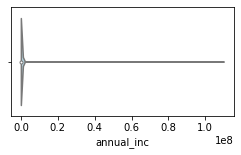

In [26]:
dist(dados_WoE_VI, 'annual_inc')

In [27]:
prepr_temp = df_inputs[df_inputs['annual_inc'] <= 150000].copy()
prepr_temp['annual_inc_factor'] = pd.cut(prepr_temp['annual_inc'], 10)

df_temp = woe_continua(prepr_temp, 'annual_inc_factor', df_targets[prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-150.0, 15000.0]",7724,0.869109,0.009419,6713.0,1011.0,0.009443,0.009263,0.019254,NaN,NaN,0.024692
1,"(15000.0, 30000.0]",56974,0.838400,0.069476,47767.0,9207.0,0.067191,0.084354,-0.227481,0.030709,0.246735,0.024692
2,"(30000.0, 45000.0]",142895,0.847279,0.174250,121072.0,21823.0,0.170305,0.199941,-0.160431,0.008879,0.067050,0.024692
3,"(45000.0, 60000.0]",175744,0.856792,0.214307,150576.0,25168.0,0.211807,0.230588,-0.084957,0.009512,0.075474,0.024692
4,"(60000.0, 75000.0]",144975,0.867901,0.176786,125824.0,19151.0,0.176990,0.175461,0.008678,0.011110,0.093635,0.024692
5,"(75000.0, 90000.0]",108934,0.878761,0.132837,95727.0,13207.0,0.134654,0.121002,0.106902,0.010860,0.098224,0.024692
6,"(90000.0, 105000.0]",73272,0.887160,0.089350,65004.0,8268.0,0.091438,0.075751,0.188205,0.008399,0.081303,0.024692
7,"(105000.0, 120000.0]",52036,0.894304,0.063454,46536.0,5500.0,0.065460,0.050391,0.261626,0.007144,0.073422,0.024692
8,"(120000.0, 135000.0]",30992,0.898296,0.037792,27840.0,3152.0,0.039161,0.028878,0.304585,0.003992,0.042959,0.024692
9,"(135000.0, 150000.0]",26512,0.899668,0.032329,23852.0,2660.0,0.033551,0.024371,0.319690,0.001372,0.015105,0.024692


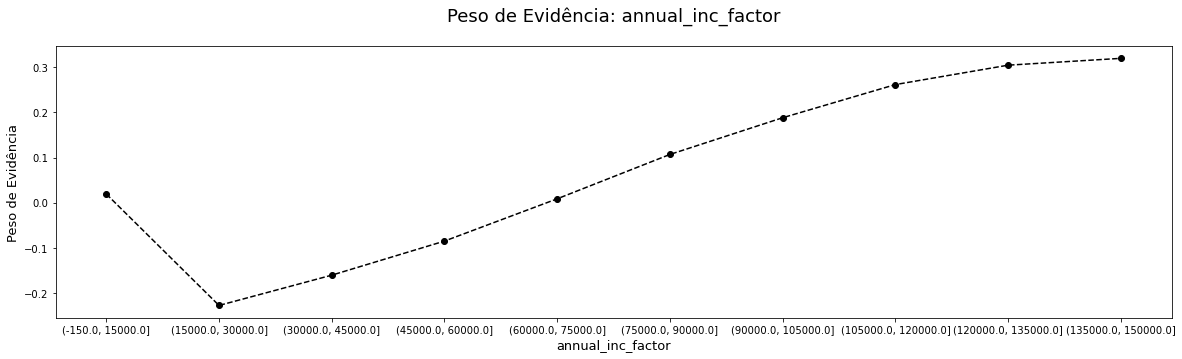

In [28]:
plot_woe(df_temp)

In [29]:
df_inputs['annual_inc:<30000']        = np.where((df_inputs['annual_inc'] <= 30000), 1, 0)
df_inputs['annual_inc:30000-45000']   = np.where((df_inputs['annual_inc'] > 30000)  & (df_inputs['annual_inc'] <= 45000), 1, 0)
df_inputs['annual_inc:45000-60000']   = np.where((df_inputs['annual_inc'] > 45000)  & (df_inputs['annual_inc'] <= 60000), 1, 0)
df_inputs['annual_inc:60000-75000']   = np.where((df_inputs['annual_inc'] > 60000)  & (df_inputs['annual_inc'] <= 75000), 1, 0)
df_inputs['annual_inc:75000-90000']   = np.where((df_inputs['annual_inc'] > 75000)  & (df_inputs['annual_inc'] <= 90000), 1, 0)
df_inputs['annual_inc:90000-105000']  = np.where((df_inputs['annual_inc'] > 90000)  & (df_inputs['annual_inc'] <= 105000), 1, 0)
df_inputs['annual_inc:105000-120000'] = np.where((df_inputs['annual_inc'] > 105000) & (df_inputs['annual_inc'] <= 120000), 1, 0)
df_inputs['annual_inc:120000-135000'] = np.where((df_inputs['annual_inc'] > 120000) & (df_inputs['annual_inc'] <= 135000), 1, 0)
df_inputs['annual_inc:>135000']       = np.where((df_inputs['annual_inc'] > 135000), 1, 0)

`dti`

Número de valores únicos: 9290
Distribuição:
count    877648.000000
mean         19.290343
std          16.019488
min           0.000000
25%          12.050000
50%          18.070000
75%          24.870000
max         999.000000
Name: dti, dtype: float64


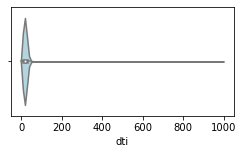

In [30]:
dist(dados_WoE_VI, 'dti')

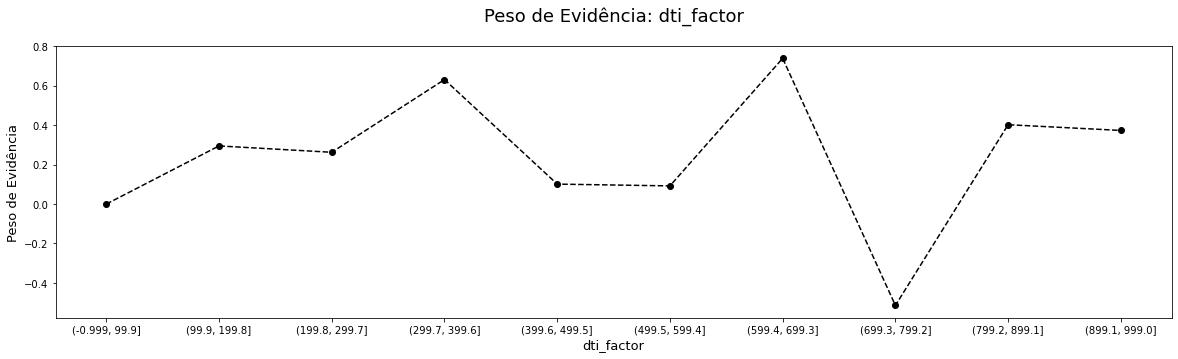

In [31]:
prepr_temp = df_inputs.copy()

prepr_temp['dti_factor'] = pd.cut(df_inputs['dti'], 10)
plot_woe(woe_continua(prepr_temp,'dti_factor', df_targets[prepr_temp.index]))

In [32]:
df_inputs['dti:<199.8']      = np.where((df_inputs['dti'] <= 199.8), 1, 0)
df_inputs['dti:199.8-399.6'] = np.where((df_inputs['dti'] > 199.8) & (df_inputs['dti'] <= 399.6), 1, 0)
df_inputs['dti:399.6-599.4'] = np.where((df_inputs['dti'] >399.6)  & (df_inputs['dti'] <= 599.4), 1, 0)
df_inputs['dti:599.4-699.3'] = np.where((df_inputs['dti'] > 599.4) & (df_inputs['dti'] <= 699.3), 1, 0)
df_inputs['dti:699.3-799.2'] = np.where((df_inputs['dti'] > 699.3) & (df_inputs['dti'] <= 799.2), 1, 0)
df_inputs['dti:>799.2']      = np.where((df_inputs['dti'] > 799.2), 1, 0)

`inq_last_6mths`

Número de valores únicos: 19
Distribuição:
count    877648.000000
mean          0.553079
std           0.858343
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          32.000000
Name: inq_last_6mths, dtype: float64


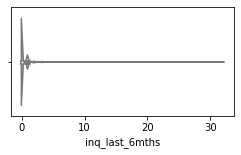

In [33]:
dist(dados_WoE_VI, 'inq_last_6mths')

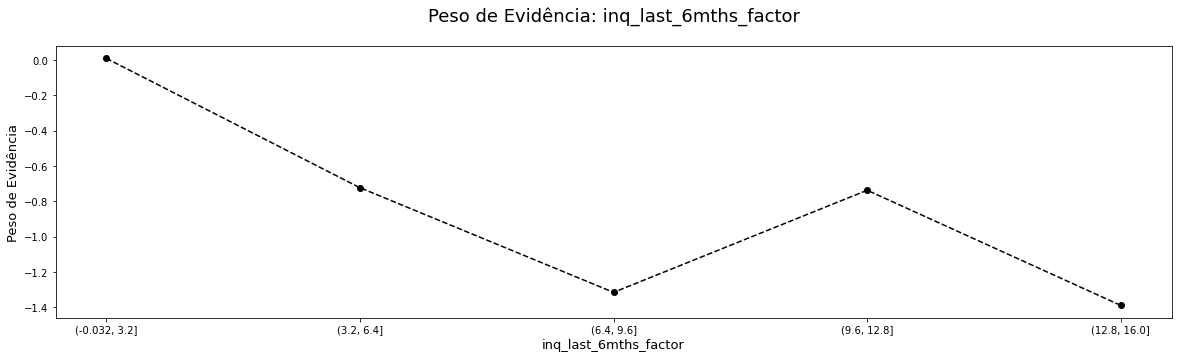

In [34]:
prepr_temp = df_inputs.copy()

prepr_temp['inq_last_6mths_factor'] = pd.cut(df_inputs['inq_last_6mths'], 10)
plot_woe(woe_continua(prepr_temp,'inq_last_6mths_factor', df_targets[prepr_temp.index]))

In [35]:
df_inputs['inq_last_6mths:<3.2']     = np.where((df_inputs['inq_last_6mths'] <= 3.2), 1, 0)
df_inputs['inq_last_6mths:3.2-6.4']  = np.where((df_inputs['inq_last_6mths'] > 3.2) & (df_inputs['inq_last_6mths'] <= 6.4), 1, 0)
df_inputs['inq_last_6mths:6.4-9.6']  = np.where((df_inputs['inq_last_6mths'] > 6.4) & (df_inputs['inq_last_6mths'] <= 9.6), 1, 0)
df_inputs['inq_last_6mths:>9.6']     = np.where((df_inputs['inq_last_6mths'] > 9.6), 1, 0)

`revol_util`

Número de valores únicos: 1245
Distribuição:
count    877648.000000
mean         48.961379
std          24.928945
min           0.000000
25%          29.700000
50%          48.600000
75%          68.100000
max         184.600000
Name: revol_util, dtype: float64


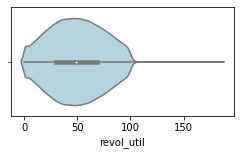

In [36]:
dist(dados_WoE_VI, 'revol_util')

In [37]:
prepr_temp = df_inputs[df_inputs['revol_util'] <= 100].copy()
prepr_temp['revol_util_factor'] = pd.cut(prepr_temp['revol_util'], 10)

df_temp = woe_continua(prepr_temp, 'revol_util_factor', df_targets[prepr_temp.index])
df_temp

,revol_util_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-0.1, 10.0]",53647,0.904766,0.061315,48538.0,5109.0,0.063755,0.044965,0.349161,NaN,NaN,0.031285
1,"(10.0, 20.0]",72084,0.904722,0.082387,65216.0,6868.0,0.085662,0.060447,0.348649,0.000044,0.000511,0.031285
2,"(20.0, 30.0]",97523,0.891113,0.111463,86904.0,10619.0,0.114149,0.093460,0.199976,0.013609,0.148673,0.031285
3,"(30.0, 40.0]",114480,0.878450,0.130843,100565.0,13915.0,0.132093,0.122469,0.075654,0.012662,0.124322,0.031285
4,"(40.0, 50.0]",118898,0.868669,0.135893,103283.0,15615.0,0.135663,0.137431,-0.012942,0.009781,0.088596,0.031285
5,"(50.0, 60.0]",116228,0.858846,0.132841,99822.0,16406.0,0.131117,0.144392,-0.096441,0.009823,0.083499,0.031285
6,"(60.0, 70.0]",104833,0.852775,0.119817,89399.0,15434.0,0.117427,0.135838,-0.145646,0.006071,0.049205,0.031285
7,"(70.0, 80.0]",87513,0.852788,0.100022,74630.0,12883.0,0.098027,0.113386,-0.145549,0.000012,0.000097,0.031285
8,"(80.0, 90.0]",66245,0.847989,0.075714,56175.0,10070.0,0.073787,0.088628,-0.183272,0.004799,0.037723,0.031285
9,"(90.0, 100.0]",43488,0.845889,0.049704,36786.0,6702.0,0.048319,0.058986,-0.199471,0.002100,0.016200,0.031285


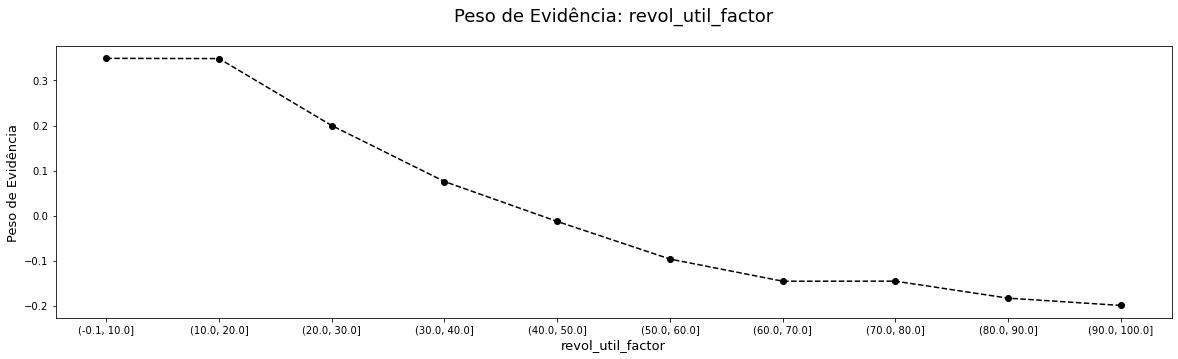

In [38]:
plot_woe(df_temp)

In [39]:
df_inputs['revol_util:<20']   = np.where((df_inputs['revol_util'] <= 20), 1, 0)
df_inputs['revol_util:20-30'] = np.where((df_inputs['revol_util'] > 20) & (df_inputs['revol_util'] <= 30), 1, 0)
df_inputs['revol_util:30-40'] = np.where((df_inputs['revol_util'] > 30) & (df_inputs['revol_util'] <= 40), 1, 0)
df_inputs['revol_util:40-50'] = np.where((df_inputs['revol_util'] > 40) & (df_inputs['revol_util'] <= 50), 1, 0)
df_inputs['revol_util:50-60'] = np.where((df_inputs['revol_util'] > 50) & (df_inputs['revol_util'] <= 60), 1, 0)
df_inputs['revol_util:60-70'] = np.where((df_inputs['revol_util'] > 60) & (df_inputs['revol_util'] <= 70), 1, 0)
df_inputs['revol_util:>70']   = np.where((df_inputs['revol_util'] > 70), 1, 0)

`tot_cur_bal`

Número de valores únicos: 343390
Distribuição:
count    8.776480e+05
mean     1.418145e+05
std      1.634241e+05
min      0.000000e+00
25%      2.751400e+04
50%      7.581900e+04
75%      2.136290e+05
max      9.971659e+06
Name: tot_cur_bal, dtype: float64


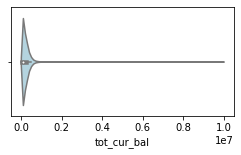

In [40]:
dist(dados_WoE_VI, 'tot_cur_bal')

In [41]:
prepr_temp = df_inputs[df_inputs['tot_cur_bal'] <= 400000].copy()
prepr_temp['tot_cur_bal_factor'] = pd.cut(prepr_temp['tot_cur_bal'], 10)

df_temp = woe_continua(prepr_temp, 'tot_cur_bal_factor', df_targets[prepr_temp.index])
df_temp

,tot_cur_bal_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-400.0, 40000.0]",305755,0.853504,0.374944,260963.0,44792.0,0.369294,0.411634,-0.108543,NaN,NaN,0.02282
1,"(40000.0, 80000.0]",142422,0.851800,0.174650,121315.0,21107.0,0.171675,0.193971,-0.122106,0.001704,0.013563,0.02282
2,"(80000.0, 120000.0]",70428,0.866914,0.086365,61055.0,9373.0,0.086400,0.086137,0.003050,0.015114,0.125156,0.02282
3,"(120000.0, 160000.0]",61827,0.874068,0.075818,54041.0,7786.0,0.076474,0.071553,0.066524,0.007154,0.063474,0.02282
4,"(160000.0, 200000.0]",59360,0.881570,0.072792,52330.0,7030.0,0.074053,0.064605,0.136491,0.007502,0.069967,0.02282
5,"(200000.0, 240000.0]",51523,0.884712,0.063182,45583.0,5940.0,0.064505,0.054588,0.166934,0.003142,0.030443,0.02282
6,"(240000.0, 280000.0]",42599,0.889927,0.052239,37910.0,4689.0,0.053647,0.043091,0.219104,0.005215,0.052170,0.02282
7,"(280000.0, 320000.0]",34780,0.898476,0.042650,31249.0,3531.0,0.044221,0.032450,0.309514,0.008549,0.090411,0.02282
8,"(320000.0, 360000.0]",26743,0.901582,0.032795,24111.0,2632.0,0.034120,0.024188,0.344032,0.003106,0.034518,0.02282
9,"(360000.0, 400000.0]",20032,0.903405,0.024565,18097.0,1935.0,0.025609,0.017782,0.364747,0.001823,0.020715,0.02282


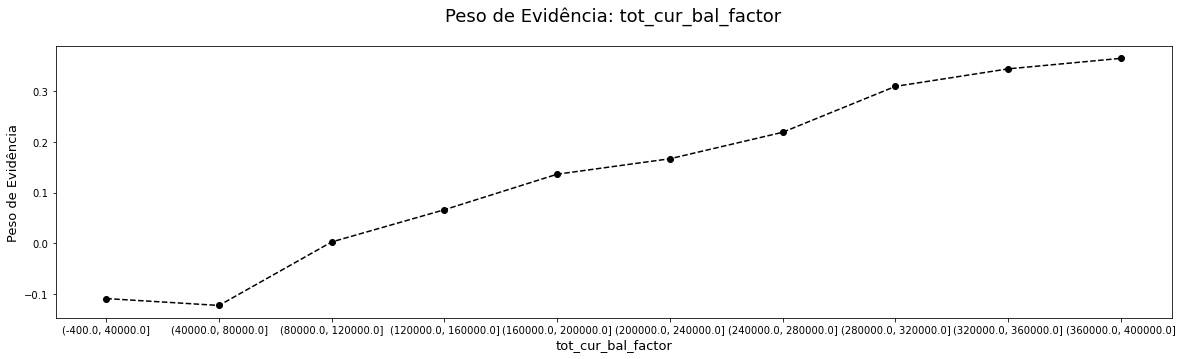

In [42]:
plot_woe(df_temp)

In [43]:
df_inputs['tot_cur_bal:<40000']        = np.where((df_inputs['tot_cur_bal'] <= 40000), 1, 0)
df_inputs['tot_cur_bal:40000-80000']   = np.where((df_inputs['tot_cur_bal'] > 40000)  & (df_inputs['tot_cur_bal'] <= 80000), 1, 0)
df_inputs['tot_cur_bal:80000-120000']  = np.where((df_inputs['tot_cur_bal'] > 120000) & (df_inputs['tot_cur_bal'] <= 160000), 1, 0)
df_inputs['tot_cur_bal:120000-160000'] = np.where((df_inputs['tot_cur_bal'] > 120000) & (df_inputs['tot_cur_bal'] <= 160000), 1, 0)
df_inputs['tot_cur_bal:160000-200000'] = np.where((df_inputs['tot_cur_bal'] > 160000) & (df_inputs['tot_cur_bal'] <= 200000), 1, 0)
df_inputs['tot_cur_bal:200000-240000'] = np.where((df_inputs['tot_cur_bal'] > 200000) & (df_inputs['tot_cur_bal'] <= 240000), 1, 0)
df_inputs['tot_cur_bal:240000-320000'] = np.where((df_inputs['tot_cur_bal'] > 240000) & (df_inputs['tot_cur_bal'] <= 320000), 1, 0)
df_inputs['tot_cur_bal:320000-400000'] = np.where((df_inputs['tot_cur_bal'] > 320000) & (df_inputs['tot_cur_bal'] <= 400000), 1, 0)
df_inputs['tot_cur_bal:>400000']       = np.where((df_inputs['tot_cur_bal'] > 400000), 1, 0)

`mths_since_rcnt_il`

Número de valores únicos: 358
Distribuição:
count    877648.000000
mean         13.946480
std          22.745488
min           0.000000
25%           0.000000
50%           7.000000
75%          17.000000
max         507.000000
Name: mths_since_rcnt_il, dtype: float64


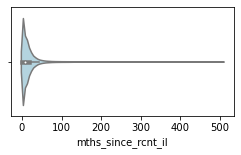

In [44]:
dist(dados_WoE_VI, 'mths_since_rcnt_il')

In [45]:
prepr_temp = df_inputs[df_inputs['mths_since_rcnt_il'] <= 100].copy()
prepr_temp['mths_since_rcnt_il_factor'] = pd.cut(prepr_temp['mths_since_rcnt_il'], 10)

df_temp = woe_continua(prepr_temp, 'mths_since_rcnt_il_factor', df_targets[prepr_temp.index])
df_temp

,mths_since_rcnt_il_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-0.1, 10.0]",522084,0.849375,0.605148,443445.0,78639.0,0.590988,0.699685,-0.168834,NaN,NaN,0.053057
1,"(10.0, 20.0]",175625,0.896541,0.203567,157455.0,18170.0,0.209843,0.161666,0.260827,0.047166,0.429662,0.053057
2,"(20.0, 30.0]",77663,0.905026,0.090019,70287.0,7376.0,0.093673,0.065627,0.355815,0.008485,0.094988,0.053057
3,"(30.0, 40.0]",37455,0.908477,0.043414,34027.0,3428.0,0.045348,0.030500,0.396637,0.003451,0.040822,0.053057
4,"(40.0, 50.0]",18946,0.907316,0.021960,17190.0,1756.0,0.022909,0.015624,0.382749,0.001161,0.013888,0.053057
5,"(50.0, 60.0]",11147,0.903561,0.012921,10072.0,1075.0,0.013423,0.009565,0.338898,0.003754,0.043851,0.053057
6,"(60.0, 70.0]",7300,0.899452,0.008461,6566.0,734.0,0.008751,0.006531,0.292611,0.004109,0.046288,0.053057
7,"(70.0, 80.0]",5126,0.911627,0.005942,4673.0,453.0,0.006228,0.004031,0.435124,0.012175,0.142513,0.053057
8,"(80.0, 90.0]",3972,0.901309,0.004604,3580.0,392.0,0.004771,0.003488,0.313316,0.010318,0.121808,0.053057
9,"(90.0, 100.0]",3419,0.892074,0.003963,3050.0,369.0,0.004065,0.003283,0.213560,0.009235,0.099756,0.053057


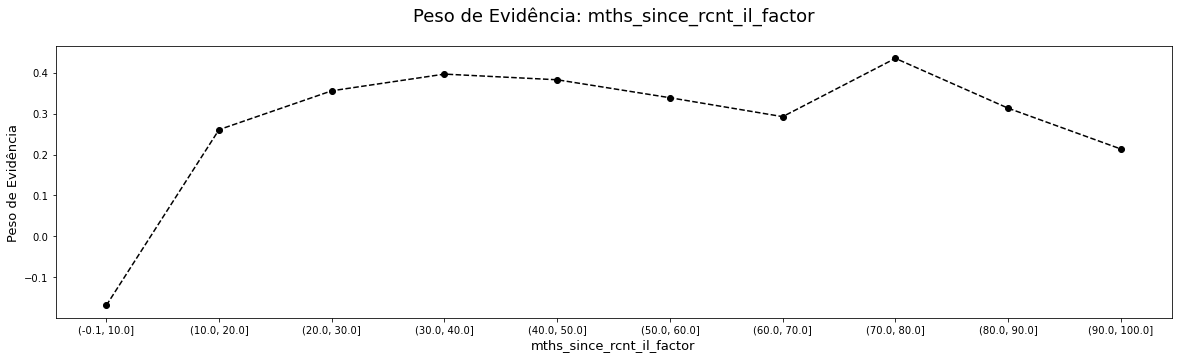

In [46]:
plot_woe(df_temp)

In [47]:
df_inputs['mths_since_rcnt_il:<10']   = np.where((df_inputs['mths_since_rcnt_il'] <= 10), 1, 0)
df_inputs['mths_since_rcnt_il:10-20'] = np.where((df_inputs['mths_since_rcnt_il'] > 10) & (df_inputs['mths_since_rcnt_il'] <= 20), 1, 0)
df_inputs['mths_since_rcnt_il:20-40'] = np.where((df_inputs['mths_since_rcnt_il'] > 20) & (df_inputs['mths_since_rcnt_il'] <= 40), 1, 0)
df_inputs['mths_since_rcnt_il:40-70'] = np.where((df_inputs['mths_since_rcnt_il'] > 40) & (df_inputs['mths_since_rcnt_il'] <= 70), 1, 0)
df_inputs['mths_since_rcnt_il:>70']   = np.where((df_inputs['mths_since_rcnt_il'] > 70), 1, 0)

`total_bal_il`

Número de valores únicos: 127537
Distribuição:
count    8.776480e+05
mean     2.599508e+04
std      4.214553e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.141400e+04
75%      3.548400e+04
max      1.837038e+06
Name: total_bal_il, dtype: float64


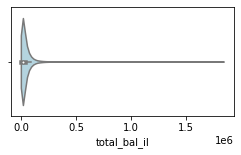

In [48]:
dist(dados_WoE_VI, 'total_bal_il')

In [49]:
prepr_temp = df_inputs[df_inputs['total_bal_il'] <= 10000].copy()
prepr_temp['total_bal_il_factor'] = pd.cut(prepr_temp['total_bal_il'], 10)

df_temp = woe_continua(prepr_temp, 'total_bal_il_factor', df_targets[prepr_temp.index])
df_temp

,total_bal_il_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-10.0, 1000.0]",331446,0.836450,0.782731,277238.0,54208.0,0.771230,0.847357,-0.094136,NaN,NaN,0.038337
1,"(1000.0, 2000.0]",7495,0.902468,0.017700,6764.0,731.0,0.018816,0.011427,0.498773,0.066018,0.592908,0.038337
2,"(2000.0, 3000.0]",9066,0.898412,0.021410,8145.0,921.0,0.022658,0.014397,0.453516,0.004057,0.045257,0.038337
3,"(3000.0, 4000.0]",9979,0.897886,0.023566,8960.0,1019.0,0.024925,0.015929,0.447765,0.000526,0.005751,0.038337
4,"(4000.0, 5000.0]",10692,0.892349,0.025250,9541.0,1151.0,0.026541,0.017992,0.388784,0.005536,0.058981,0.038337
5,"(5000.0, 6000.0]",10466,0.895758,0.024716,9375.0,1091.0,0.026080,0.017054,0.424768,0.003408,0.035985,0.038337
6,"(6000.0, 7000.0]",10885,0.891778,0.025706,9707.0,1178.0,0.027003,0.018414,0.382846,0.003980,0.041923,0.038337
7,"(7000.0, 8000.0]",11025,0.887982,0.026036,9790.0,1235.0,0.027234,0.019305,0.344107,0.003796,0.038739,0.038337
8,"(8000.0, 9000.0]",11134,0.891953,0.026294,9931.0,1203.0,0.027626,0.018805,0.384659,0.003971,0.040552,0.038337
9,"(9000.0, 10000.0]",11260,0.890231,0.026591,10024.0,1236.0,0.027885,0.019321,0.366918,0.001722,0.017741,0.038337


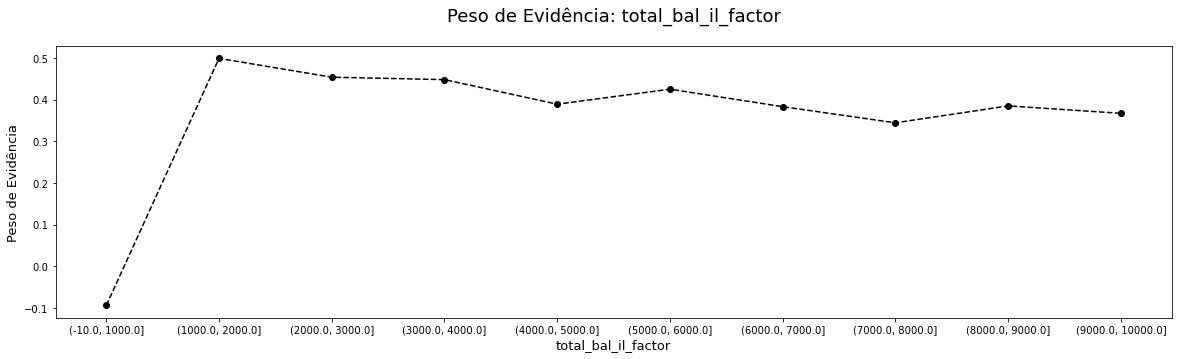

In [50]:
plot_woe(df_temp)

In [51]:
df_inputs['total_bal_il:<1000']     = np.where((df_inputs['total_bal_il'] <= 1000), 1, 0)
df_inputs['total_bal_il:1000-7000'] = np.where((df_inputs['total_bal_il'] > 1000) & (df_inputs['total_bal_il'] <= 7000), 1, 0)
df_inputs['total_bal_il:>7000']     = np.where((df_inputs['total_bal_il'] > 7000), 1, 0)

`funded_amnt`

Número de valores únicos: 1567
Distribuição:
count    877648.000000
mean      15345.913396
std        9466.009368
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       40000.000000
Name: funded_amnt, dtype: float64


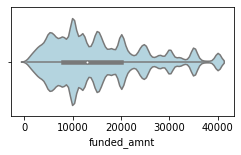

In [52]:
dist(dados_WoE_VI, 'funded_amnt')

In [53]:
prepr_temp = df_inputs[df_inputs['funded_amnt'] <= 10000].copy()
prepr_temp['funded_amnt_factor'] = pd.cut(prepr_temp['funded_amnt'], 10)

df_temp = woe_continua(prepr_temp, 'funded_amnt_factor', df_targets[prepr_temp.index])
df_temp

,funded_amnt_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(490.5, 1450.0]",6498,0.913512,0.019007,5936.0,562.0,0.019593,0.014443,0.304961,NaN,NaN,0.009763
1,"(1450.0, 2400.0]",15779,0.907028,0.046153,14312.0,1467.0,0.047239,0.037700,0.225551,0.006484,0.079410,0.009763
2,"(2400.0, 3350.0]",22476,0.899671,0.065742,20221.0,2255.0,0.066743,0.057951,0.141244,0.007358,0.084307,0.009763
3,"(3350.0, 4300.0]",26437,0.896244,0.077328,23694.0,2743.0,0.078206,0.070492,0.103842,0.003427,0.037402,0.009763
4,"(4300.0, 5250.0]",45456,0.885142,0.132959,40235.0,5221.0,0.132802,0.134175,-0.010279,0.011102,0.114121,0.009763
5,"(5250.0, 6200.0]",41040,0.892519,0.120042,36629.0,4411.0,0.120900,0.113358,0.064411,0.007378,0.074691,0.009763
6,"(6200.0, 7150.0]",27958,0.888547,0.081777,24842.0,3116.0,0.081995,0.080078,0.023658,0.003972,0.040753,0.009763
7,"(7150.0, 8100.0]",44964,0.879303,0.131519,39537.0,5427.0,0.130498,0.139469,-0.066477,0.009244,0.090135,0.009763
8,"(8100.0, 9050.0]",23815,0.880831,0.069659,20977.0,2838.0,0.069238,0.072934,-0.052001,0.001528,0.014477,0.009763
9,"(9050.0, 10000.0]",87458,0.875689,0.255814,76586.0,10872.0,0.252785,0.279400,-0.100104,0.005143,0.048103,0.009763


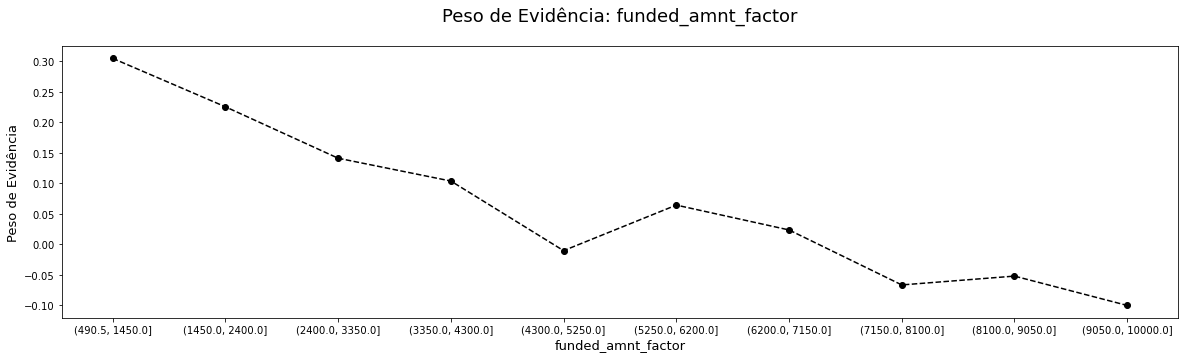

In [54]:
plot_woe(df_temp)

In [55]:
df_inputs['funded_amnt:<1450']     = np.where((df_inputs['funded_amnt'] <= 1450), 1, 0)
df_inputs['funded_amnt:1450-2400'] = np.where((df_inputs['funded_amnt'] > 1450) & (df_inputs['funded_amnt'] <= 2400), 1, 0)
df_inputs['funded_amnt:2400-3350'] = np.where((df_inputs['funded_amnt'] > 2400) & (df_inputs['funded_amnt'] <= 3350), 1, 0)
df_inputs['funded_amnt:3350-5250'] = np.where((df_inputs['funded_amnt'] > 3350) & (df_inputs['funded_amnt'] <= 5250), 1, 0)
df_inputs['funded_amnt:5250-6200'] = np.where((df_inputs['funded_amnt'] > 5250) & (df_inputs['funded_amnt'] <= 6200), 1, 0)
df_inputs['funded_amnt:6200-8100'] = np.where((df_inputs['funded_amnt'] > 6200) & (df_inputs['funded_amnt'] <= 8100), 1, 0)
df_inputs['funded_amnt:8100-9050'] = np.where((df_inputs['funded_amnt'] > 8100) & (df_inputs['funded_amnt'] <= 9050), 1, 0)
df_inputs['funded_amnt:>9050']     = np.where((df_inputs['funded_amnt'] > 9050), 1, 0)

`max_bal_bc`

Número de valores únicos: 29745
Distribuição:
count    877648.000000
mean       4230.978431
std        5541.568807
min           0.000000
25%           0.000000
50%        2682.000000
75%        6186.000000
max      500000.000000
Name: max_bal_bc, dtype: float64


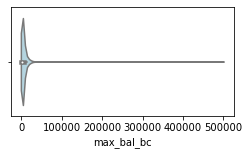

In [56]:
dist(dados_WoE_VI, 'max_bal_bc')

In [57]:
prepr_temp = df_inputs[df_inputs['max_bal_bc'] <= 10000].copy()
prepr_temp['max_bal_bc_factor'] = pd.cut(prepr_temp['max_bal_bc'], 10)

df_temp = woe_continua(prepr_temp, 'max_bal_bc_factor', df_targets[prepr_temp.index])
df_temp

,max_bal_bc_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-10.0, 1000.0]",324341,0.832852,0.416963,270128.0,54213.0,0.402206,0.510245,-0.237926,NaN,NaN,0.053978
1,"(1000.0, 2000.0]",65811,0.870888,0.084605,57314.0,8497.0,0.085337,0.079973,0.064930,0.038036,0.302857,0.053978
2,"(2000.0, 3000.0]",73995,0.875586,0.095126,64789.0,9206.0,0.096467,0.086646,0.107379,0.004698,0.042449,0.053978
3,"(3000.0, 4000.0]",69193,0.880494,0.088952,60924.0,8269.0,0.090713,0.077827,0.153212,0.004908,0.045833,0.053978
4,"(4000.0, 5000.0]",65062,0.882220,0.083642,57399.0,7663.0,0.085464,0.072123,0.169722,0.001726,0.016510,0.053978
5,"(5000.0, 6000.0]",51820,0.889097,0.066618,46073.0,5747.0,0.068600,0.054090,0.237648,0.006877,0.067926,0.053978
6,"(6000.0, 7000.0]",41780,0.896673,0.053711,37463.0,4317.0,0.055780,0.040631,0.316892,0.007576,0.079244,0.053978
7,"(7000.0, 8000.0]",34148,0.899555,0.043900,30718.0,3430.0,0.045737,0.032283,0.348387,0.002882,0.031495,0.053978
8,"(8000.0, 9000.0]",27437,0.906622,0.035272,24875.0,2562.0,0.037038,0.024113,0.429174,0.007068,0.080787,0.053978
9,"(9000.0, 10000.0]",24278,0.903410,0.031211,21933.0,2345.0,0.032657,0.022071,0.391806,0.003212,0.037368,0.053978


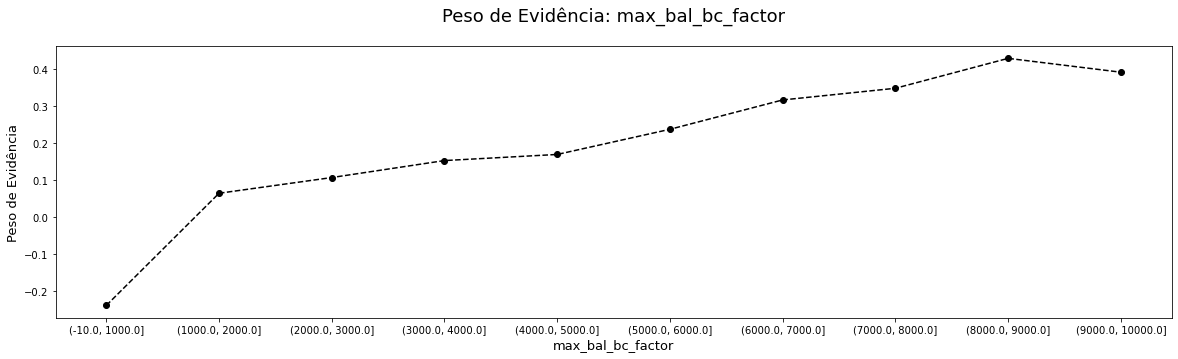

In [58]:
plot_woe(df_temp)

In [59]:
df_inputs['max_bal_bc:<12500']      = np.where((df_inputs['max_bal_bc'] <= 12500), 1, 0)
df_inputs['max_bal_bc:12500-25000'] = np.where((df_inputs['max_bal_bc'] > 12500) & (df_inputs['max_bal_bc'] <= 25000), 1, 0)
df_inputs['max_bal_bc:25000-37500'] = np.where((df_inputs['max_bal_bc'] > 25000) & (df_inputs['max_bal_bc'] <= 37500), 1, 0)
df_inputs['max_bal_bc:>37500']      = np.where((df_inputs['max_bal_bc'] > 37500), 1, 0)

`total_rev_hi_lim`

Número de valores únicos: 16065
Distribuição:
count    8.776480e+05
mean     3.574251e+04
std      3.722942e+04
min      0.000000e+00
25%      1.490000e+04
50%      2.620000e+04
75%      4.490000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64


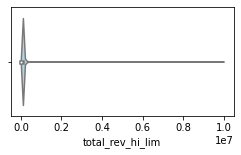

In [60]:
dist(dados_WoE_VI, 'total_rev_hi_lim')

In [61]:
prepr_temp = df_inputs[df_inputs['total_rev_hi_lim'] <= 100000].copy()
prepr_temp['total_rev_hi_lim_factor'] = pd.cut(prepr_temp['total_rev_hi_lim'], 10)

df_temp = woe_continua(prepr_temp, 'total_rev_hi_lim_factor', df_targets[prepr_temp.index])
df_temp

,total_rev_hi_lim_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-100.0, 10000.0]",118495,0.839774,0.141198,99509.0,18986.0,0.136711,0.170537,-0.221082,NaN,NaN,0.044983
1,"(10000.0, 20000.0]",208999,0.848511,0.249042,177338.0,31661.0,0.243636,0.284386,-0.154657,0.008737,0.066426,0.044983
2,"(20000.0, 30000.0]",169768,0.861116,0.202295,146190.0,23578.0,0.200844,0.211783,-0.053035,0.012605,0.101621,0.044983
3,"(30000.0, 40000.0]",118315,0.874217,0.140984,103433.0,14882.0,0.142102,0.133673,0.061143,0.013101,0.114179,0.044983
4,"(40000.0, 50000.0]",80127,0.887079,0.095479,71079.0,9048.0,0.097652,0.081271,0.183620,0.012862,0.122477,0.044983
5,"(50000.0, 60000.0]",53044,0.898085,0.063207,47638.0,5406.0,0.065448,0.048558,0.298493,0.011005,0.114873,0.044983
6,"(60000.0, 70000.0]",36332,0.906529,0.043293,32936.0,3396.0,0.045249,0.030504,0.394340,0.008444,0.095847,0.044983
7,"(70000.0, 80000.0]",24522,0.915056,0.029220,22439.0,2083.0,0.030828,0.018710,0.499363,0.008527,0.105023,0.044983
8,"(80000.0, 90000.0]",17346,0.921884,0.020669,15991.0,1355.0,0.021969,0.012171,0.590596,0.006828,0.091233,0.044983
9,"(90000.0, 100000.0]",12263,0.923673,0.014613,11327.0,936.0,0.015562,0.008407,0.615701,0.001789,0.025104,0.044983


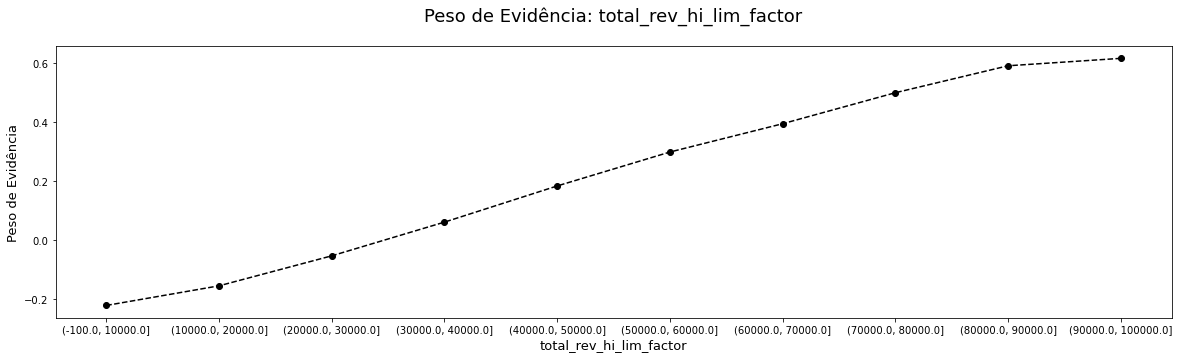

In [62]:
plot_woe(df_temp)

In [63]:
df_inputs['total_rev_hi_lim:<10000']       = np.where((df_inputs['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs['total_rev_hi_lim:10000-20000']  = np.where((df_inputs['total_rev_hi_lim'] > 10000) & (df_inputs['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs['total_rev_hi_lim:20000-40000']  = np.where((df_inputs['total_rev_hi_lim'] > 20000) & (df_inputs['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs['total_rev_hi_lim:40000-60000']  = np.where((df_inputs['total_rev_hi_lim'] > 40000) & (df_inputs['total_rev_hi_lim'] <= 60000), 1, 0)
df_inputs['total_rev_hi_lim:60000-80000']  = np.where((df_inputs['total_rev_hi_lim'] > 60000) & (df_inputs['total_rev_hi_lim'] <= 80000), 1, 0)
df_inputs['total_rev_hi_lim:80000-100000'] = np.where((df_inputs['total_rev_hi_lim'] > 80000) & (df_inputs['total_rev_hi_lim'] <= 100000), 1, 0)
df_inputs['total_rev_hi_lim:>100000']      = np.where((df_inputs['total_rev_hi_lim'] > 100000), 1, 0)

In [64]:
pd.options.display.max_columns = None

df_inputs

,funded_amnt,term,int_rate,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,revol_util,initial_list_status,tot_cur_bal,mths_since_rcnt_il,total_bal_il,max_bal_bc,total_rev_hi_lim,grade,total_rec_prncp,loan_status,recoveries,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,initial_list_status:f,initial_list_status:w,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,purpose:small_business__educational__moving__renewable_energy,purpose:other__medical,purpose:major_purchase__vacation__house__wedding__car,term:36,term:60,int_rate:<7.484,int_rate:7.484-10.466,int_rate:10.466-13.014,int_rate:13.014-15.582,int_rate:15.582-18.15,int_rate:18.15-20.718,int_rate:20.718-23.286,int_rate:23.286-25.854,int_rate:>25.854,annual_inc:<30000,annual_inc:30000-45000,annual_inc:45000-60000,annual_inc:60000-75000,annual_inc:75000-90000,annual_inc:90000-105000,annual_inc:105000-120000,annual_inc:120000-135000,annual_inc:>135000,dti:<199.8,dti:199.8-399.6,dti:399.6-599.4,dti:599.4-699.3,dti:699.3-799.2,dti:>799.2,inq_last_6mths:<3.2,inq_last_6mths:3.2-6.4,inq_last_6mths:6.4-9.6,inq_last_6mths:>9.6,revol_util:<20,revol_util:20-30,revol_util:30-40,revol_util:40-50,revol_util:50-60,revol_util:60-70,revol_util:>70,tot_cur_bal:<40000,tot_cur_bal:40000-80000,tot_cur_bal:80000-120000,tot_cur_bal:120000-160000,tot_cur_bal:160000-200000,tot_cur_bal:200000-240000,tot_cur_bal:240000-320000,tot_cur_bal:320000-400000,tot_cur_bal:>400000,mths_since_rcnt_il:<10,mths_since_rcnt_il:10-20,mths_since_rcnt_il:20-40,mths_since_rcnt_il:40-70,mths_since_rcnt_il:>70,total_bal_il:<1000,total_bal_il:1000-7000,total_bal_il:>7000,funded_amnt:<1450,funded_amnt:1450-2400,funded_amnt:2400-3350,funded_amnt:3350-5250,funded_amnt:5250-6200,funded_amnt:6200-8100,funded_amnt:8100-9050,funded_amnt:>9050,max_bal_bc:<12500,max_bal_bc:12500-25000,max_bal_bc:25000-37500,max_bal_bc:>37500,total_rev_hi_lim:<10000,total_rev_hi_lim:10000-20000,total_rev_hi_lim:20000-40000,total_rev_hi_lim:40000-60000,total_rev_hi_lim:60000-80000,total_rev_hi_lim:80000-100000,total_rev_hi_lim:>100000
0,9000.0,36,5.32,OWN,58000.0,Source Verified,home_improvement,10.39,0.0,4.2,w,7063.0,26.0,1982.0,1301.0,120600.0,A,9000.00,Fully Paid,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,8300.0,36,9.44,RENT,54000.0,Source Verified,debt_consolidation,16.91,0.0,30.7,w,26958.0,4.0,21058.0,3075.0,19200.0,B,8300.00,Fully Paid,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,4225.0,36,17.57,RENT,35000.0,Not Verified,debt_consolidation,29.25,2.0,82.0,f,35796.0,0.0,0.0,0.0,9380.0,D,4225.00,Fully Paid,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,28000.0,36,7.49,MORTGAGE,425000.0,Source Verified,debt_consolidation,8.97,0.0,28.0,f,503070.0,0.0,0.0,0.0,75900.0,A,28000.00,Fully Paid,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,3000.0,36,5.31,M

In [65]:
data_WoE_VI_final = df_inputs.loc[:, 'purpose:car':]


# retirando categorias que foram agrupadas

data_WoE_VI_final.drop(['home_ownership:RENT', 'home_ownership:OTHER', 
                        'home_ownership:NONE', 'home_ownership:ANY',
                        'purpose:small_business', 'purpose:educational',
                        'purpose:moving', 'purpose:renewable_energy',
                        'purpose:other', 'purpose:medical', 'purpose:major_purchase',
                        'purpose:vacation', 'purpose:house', 'purpose:wedding','purpose:car'], axis = 1, inplace = True)

data_WoE_VI_final

,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,home_ownership:MORTGAGE,home_ownership:OWN,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,initial_list_status:f,initial_list_status:w,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,purpose:small_business__educational__moving__renewable_energy,purpose:other__medical,purpose:major_purchase__vacation__house__wedding__car,term:36,term:60,int_rate:<7.484,int_rate:7.484-10.466,int_rate:10.466-13.014,int_rate:13.014-15.582,int_rate:15.582-18.15,int_rate:18.15-20.718,int_rate:20.718-23.286,int_rate:23.286-25.854,int_rate:>25.854,annual_inc:<30000,annual_inc:30000-45000,annual_inc:45000-60000,annual_inc:60000-75000,annual_inc:75000-90000,annual_inc:90000-105000,annual_inc:105000-120000,annual_inc:120000-135000,annual_inc:>135000,dti:<199.8,dti:199.8-399.6,dti:399.6-599.4,dti:599.4-699.3,dti:699.3-799.2,dti:>799.2,inq_last_6mths:<3.2,inq_last_6mths:3.2-6.4,inq_last_6mths:6.4-9.6,inq_last_6mths:>9.6,revol_util:<20,revol_util:20-30,revol_util:30-40,revol_util:40-50,revol_util:50-60,revol_util:60-70,revol_util:>70,tot_cur_bal:<40000,tot_cur_bal:40000-80000,tot_cur_bal:80000-120000,tot_cur_bal:120000-160000,tot_cur_bal:160000-200000,tot_cur_bal:200000-240000,tot_cur_bal:240000-320000,tot_cur_bal:320000-400000,tot_cur_bal:>400000,mths_since_rcnt_il:<10,mths_since_rcnt_il:10-20,mths_since_rcnt_il:20-40,mths_since_rcnt_il:40-70,mths_since_rcnt_il:>70,total_bal_il:<1000,total_bal_il:1000-7000,total_bal_il:>7000,funded_amnt:<1450,funded_amnt:1450-2400,funded_amnt:2400-3350,funded_amnt:3350-5250,funded_amnt:5250-6200,funded_amnt:6200-8100,funded_amnt:8100-9050,funded_amnt:>9050,max_bal_bc:<12500,max_bal_bc:12500-25000,max_bal_bc:25000-37500,max_bal_bc:>37500,total_rev_hi_lim:<10000,total_rev_hi_lim:10000-20000,total_rev_hi_lim:20000-40000,total_rev_hi_lim:40000-60000,total_rev_hi_lim:60000-80000,total_rev_hi_lim:80000-100000,total_rev_hi_lim:>100000
0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877643,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
877644,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
877645,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
877646,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,

Retirando uma categoria criada de cada variável para evitar multicolinearidade.

In [66]:
data_WoE_VI_final.drop(['verification_status:Verified','initial_list_status:w',
                        'home_ownership:MORTGAGE', 'term:60', 'mths_since_rcnt_il:20-40',
                        'dti:199.8-399.6', 'inq_last_6mths:3.2-6.4', 'tot_cur_bal:120000-160000', 
                        'total_bal_il:<1000', 'max_bal_bc:12500-25000',
                        'int_rate:<7.484', 'annual_inc:<30000', 'grade:A',
                        'purpose:small_business__educational__moving__renewable_energy', 
                        'revol_util:<20', 'funded_amnt:<1450', 'total_rev_hi_lim:>100000'], axis = 1, inplace = True)

In [67]:
# salvando os dados

data_WoE_VI_final = pd.concat([data_WoE_VI_final, df_inputs[['funded_amnt', 'total_rec_prncp', 'loan_status', 'recoveries']], df_targets], axis = 1)

data_WoE_VI_final.to_csv('dados/dados_WoE_VI_final.csv', index = False)

---